In [53]:
from DSU import DisjointSet, DisjointSetWithBoth, DisjointSetWithPathCompression,DisjointSetWithRankOptimization, find, union
import random
import time
from statistics import mean
import pandas as pd
import matplotlib.pyplot as plt

In [19]:
def testDsus(dsus,nops,size,ratio=0.7):
    for i in range(nops):
        op = random.random()
        if op < ratio:
            x = dsus[random.randint(0, size-1)]
            find(x)
        else:
            x = dsus[random.randint(0, size-1)]
            y = dsus[random.randint(0, size-1)]
            union(x,y)

In [20]:
def testAll(size,nops,ratio,repeats=30,skipFirst=False):
    print(f'Testing with {ratio} find ratio')
    woheur=None
    if not skipFirst:
        times = []
        for i in range(repeats):
            random.seed(i)
            dsus = []
            for i in range(size):
                dsus.append(DisjointSet(i))

            start = time.time()

            testDsus(dsus,nops,size)
            times.append(time.time() - start)
        woheur=mean(times)
        print('Without heuristics:', woheur)

    times = []
    for i in range(repeats):
        random.seed(i)
        dsus = []
        for i in range(size):
            dsus.append(DisjointSetWithPathCompression(i))

        start = time.time()

        testDsus(dsus,nops,size)
        times.append(time.time() - start)
    wpathcompression= mean(times)
    print('With path compression:', wpathcompression )

    times = []
    for i in range(repeats):
        random.seed(i)
        dsus = []
        for i in range(size):
            dsus.append(DisjointSetWithRankOptimization(i))

        start = time.time()

        testDsus(dsus,nops,size)
        times.append(time.time() - start)
    wrankopt= mean(times)    
    print('With rank optimization:', wrankopt)

    times = []
    for i in range(repeats):
        random.seed(i)
        dsus = []
        for i in range(size):
            dsus.append(DisjointSetWithBoth(i))

        start = time.time()

        testDsus(dsus,nops,size)
        times.append(time.time() - start)
    wboth = mean(times)
    print('With both:', wboth)
    return [woheur,wpathcompression,wrankopt,wboth]


In [36]:
df = pd.DataFrame(columns=['N','M','Find ratio','Without heuristics','Path compression','Rank Optimization','Both heuristics'])

In [37]:
size = 10000
nops = 100000
findratio = 0.9

res=testAll(size,nops,findratio)
line = [size,nops,findratio]
line.extend(res)
df.loc[len(df)]= line

Testing with 0.9 find ratio
Without heuristics: 26.211702966690062
With path compression: 0.36321696440378826
With rank optimization: 0.3302006165186564
With both: 0.3274996836980184


In [38]:
size = 10000
nops = 100000
findratio = 0.8

res=testAll(size,nops,findratio)
line = [size,nops,findratio]
line.extend(res)
df.loc[len(df)]= line

Testing with 0.8 find ratio
Without heuristics: 23.298635387420653
With path compression: 0.3202000697453817
With rank optimization: 0.28786802291870117
With both: 0.28403300444285073


In [39]:
size = 10000
nops = 100000
findratio = 0.7

res=testAll(size,nops,findratio)
line = [size,nops,findratio]
line.extend(res)
df.loc[len(df)]= line

Testing with 0.7 find ratio
Without heuristics: 22.85383311112722
With path compression: 0.31406621138254803
With rank optimization: 0.2835670073827108
With both: 0.28510022163391113


In [40]:
size = 10000
nops = 100000
findratio = 0.6

res=testAll(size,nops,findratio)
line = [size,nops,findratio]
line.extend(res)
df.loc[len(df)]= line

Testing with 0.6 find ratio
Without heuristics: 22.88286762237549
With path compression: 0.31196688016255697
With rank optimization: 0.2824368158976237
With both: 0.2831674655278524


In [41]:
size = 10000
nops = 100000
findratio = 0.5

res=testAll(size,nops,findratio)
line = [size,nops,findratio]
line.extend(res)
df.loc[len(df)]= line

Testing with 0.5 find ratio
Without heuristics: 22.94579995473226
With path compression: 0.3123340924580892
With rank optimization: 0.28836716810862223
With both: 0.28653341929117837


In [42]:
size = 10000
nops = 100000
findratio = 0.4

res=testAll(size,nops,findratio)
line = [size,nops,findratio]
line.extend(res)
df.loc[len(df)]= line

Testing with 0.4 find ratio
Without heuristics: 22.973464306195577
With path compression: 0.3161660353342692
With rank optimization: 0.2868003765741984
With both: 0.28863413333892823


In [43]:
size = 10000
nops = 100000
findratio = 0.3

res=testAll(size,nops,findratio)
line = [size,nops,findratio]
line.extend(res)
df.loc[len(df)]= line

Testing with 0.3 find ratio
Without heuristics: 22.40216519832611
With path compression: 0.3078899383544922
With rank optimization: 0.27610653241475425
With both: 0.27664779822031654


In [44]:
size = 10000
nops = 100000
findratio = 0.2

res=testAll(size,nops,findratio)
line = [size,nops,findratio]
line.extend(res)
df.loc[len(df)]= line

Testing with 0.2 find ratio
Without heuristics: 22.966380039850872
With path compression: 0.3575666268666585
With rank optimization: 0.31743382612864174
With both: 0.29213294982910154


In [45]:
size = 10000
nops = 100000
findratio = 0.1

res=testAll(size,nops,findratio)
line = [size,nops,findratio]
line.extend(res)
df.loc[len(df)]= line

Testing with 0.1 find ratio
Without heuristics: 24.85571431318919
With path compression: 0.3609499851862589
With rank optimization: 0.3310668389002482
With both: 0.3517036199569702


In [46]:
df

,N,M,Find ratio,Without heuristics,Path compression,Rank Optimization,Both heuristics
0,10000.0,100000.0,0.9,26.211703,0.363217,0.330201,0.327500
1,10000.0,100000.0,0.8,23.298635,0.320200,0.287868,0.284033
2,10000.0,100000.0,0.7,22.853833,0.314066,0.283567,0.285100
3,10000.0,100000.0,0.6,22.882868,0.311967,0.282437,0.283167
4,10000.0,100000.0,0.5,22.945800,0.312334,0.288367,0.286533
5,10000.0,100000.0,0.4,22.973464,0.316166,0.286800,0.288634
6,10000.0,100000.0,0.3,22.402165,0.307890,0.276107,0.276648
7,10000.0,100000.0,0.2,22.966380,0.357567,0.317434,0.292133
8,10000.0,100000.0,0.1,24.855714,0.360950,0.331067,0.351704


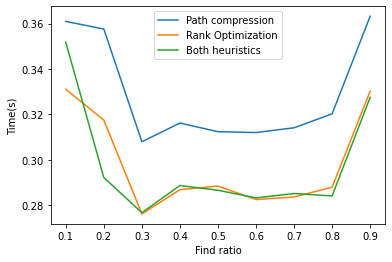

In [57]:
for i in df[['Path compression','Rank Optimization','Both heuristics']]:
    plt.plot(df['Find ratio'],df[i],label=i,marker ='o')
plt.xlabel('Find ratio')
plt.ylabel('Time(s)')
plt.legend()
plt.show()

# Testando performance das heuristicas qnd M e N crescem

In [33]:
graphBase = pd.DataFrame(columns=['N','M','Without heuristics','Path compression','Rank Optimization','Both heuristics'])

In [82]:
size = 100
nops = 10000000



res = testAll(size,nops,0.5,10,False)
line = [size,nops]
line.extend(res)
graphBase.loc[len(graphBase)]= line

Testing with 0.5 find ratio
Without heuristics: 62.55410623550415
With path compression: 26.639517498016357
With rank optimization: 27.45835700035095
With both: 28.07704327106476


In [47]:
size = 1000
nops = 10000000


res = testAll(size,nops,0.5,10,False)
line = [size,nops]
line.extend(res)
graphBase.loc[len(graphBase)]= line

Testing with 0.5 find ratio
Without heuristics: 351.17670414447787
With path compression: 28.02393548488617
With rank optimization: 28.232699465751647
With both: 28.004107236862183


In [48]:
size = 10000
nops = 10000000


res = testAll(size,nops,0.5,10,True)
line = [size,nops]
line.extend(res)
graphBase.loc[len(graphBase)]= line

Testing with 0.5 find ratio
With path compression: 26.95712742805481
With rank optimization: 28.91009063720703
With both: 28.237901353836058


In [49]:
size = 100000
nops = 10000000


res = testAll(size,nops,0.5,10,True)
line = [size,nops]
line.extend(res)
graphBase.loc[len(graphBase)]= line

Testing with 0.5 find ratio
With path compression: 29.208583211898805
With rank optimization: 31.772557663917542
With both: 30.69761562347412


In [50]:
size = 1000000
nops = 10000000


res = testAll(size,nops,0.5,10,True)
line = [size,nops]
line.extend(res)
graphBase.loc[len(graphBase)]= line

Testing with 0.5 find ratio
With path compression: 40.75686373710632
With rank optimization: 34.892935967445375
With both: 33.611916065216064


In [64]:
size = 500000
nops = 10000000


res = testAll(size,nops,0.5,10,True)
line = [size,nops]
line.extend(res)
graphBase.loc[len(graphBase)]= line

Testing with 0.5 find ratio
With path compression: 38.38501198291779
With rank optimization: 34.312521600723265
With both: 32.44102749824524


In [80]:
graphBase

,N,M,Without heuristics,Path compression,Rank Optimization,Both heuristics
6,100.0,10000000.0,NaN,26.952810,27.265362,27.895227
1,1000.0,10000000.0,351.176704,28.023935,28.232699,28.004107
2,10000.0,10000000.0,NaN,26.957127,28.910091,28.237901
3,100000.0,10000000.0,NaN,29.208583,31.772558,30.697616
4,1000000.0,10000000.0,NaN,40.756864,34.892936,33.611916


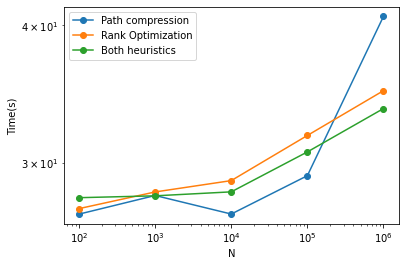

In [81]:
for i in graphBase[['Path compression','Rank Optimization','Both heuristics']]:
    plt.plot(graphBase['N'],graphBase[i],label=i,marker='o')
plt.xlabel('N')
plt.ylabel('Time(s)')
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.show()